In [ ]:
import seaborn as sns
import pandas as pd



In [ ]:
df = sns.load_dataset('titanic')


In [ ]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()


NameError: name 'df' is not defined

In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')


In [5]:
df.isnull().sum()



,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [6]:
# Fill missing ages with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Fill embarked (C, Q, S) with the most common value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Fill embark_town (town names) with the most common value (mode)
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Drop 'deck' column since too many values are missing
df = df.drop(columns=['deck'])

df.isnull().sum()   # check again


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


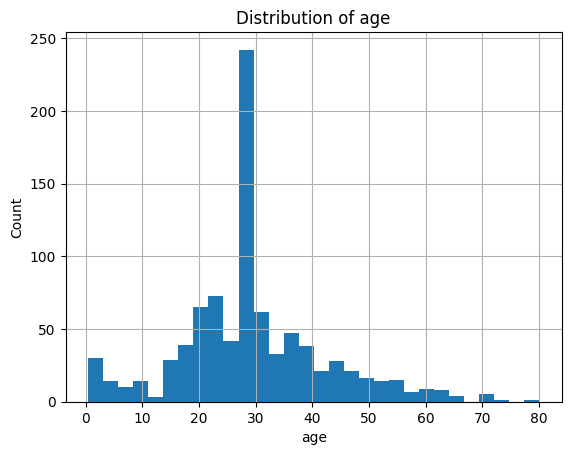

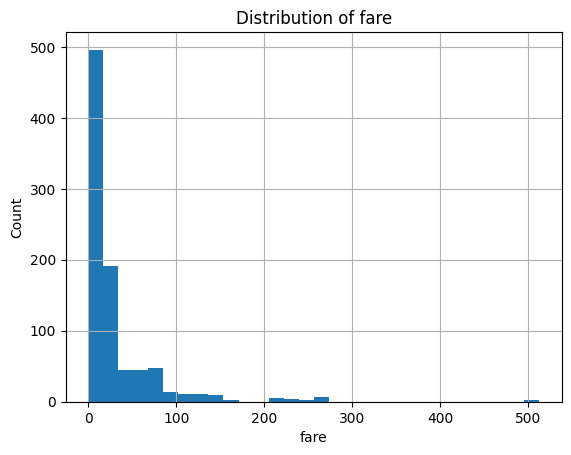

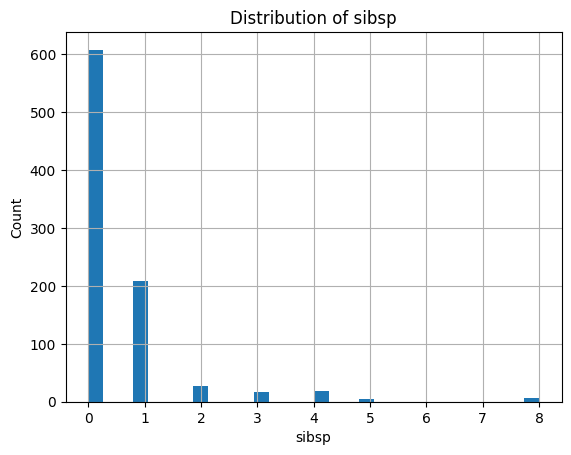

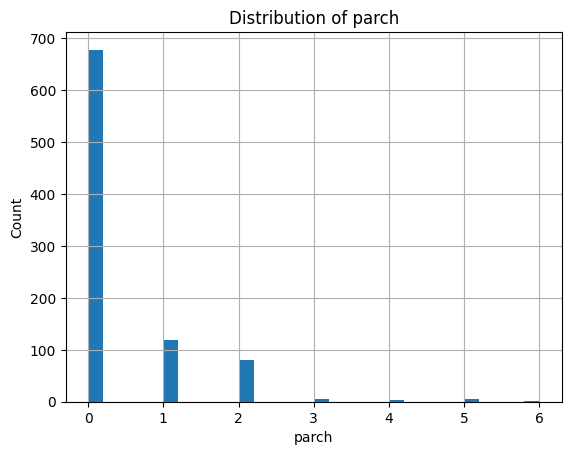

In [7]:
import matplotlib.pyplot as plt

# Create histograms for numeric columns
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

for col in numeric_cols:
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


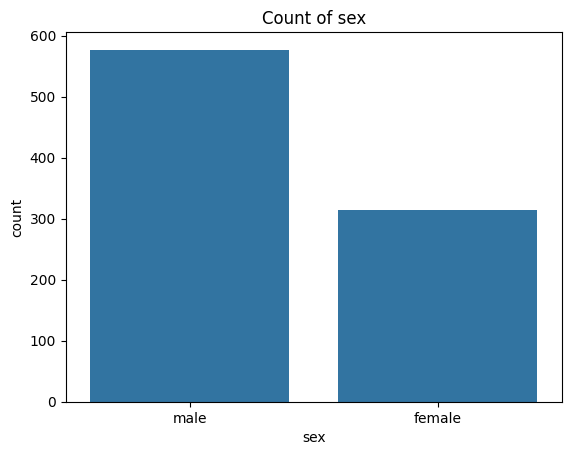

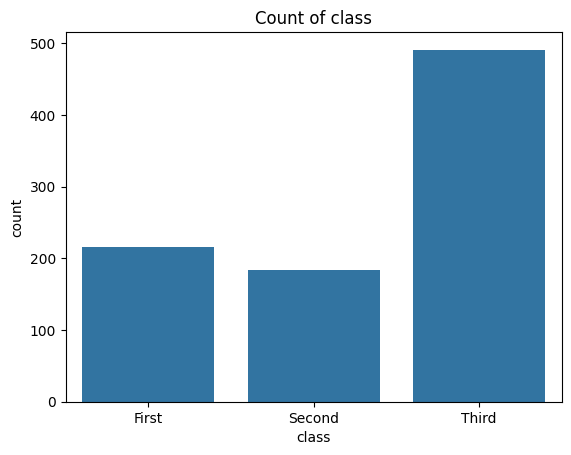

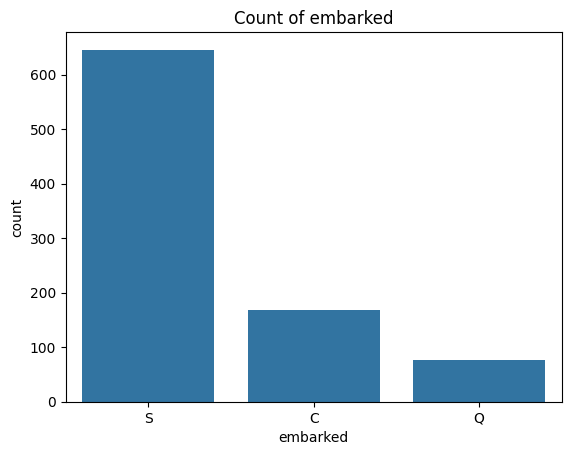

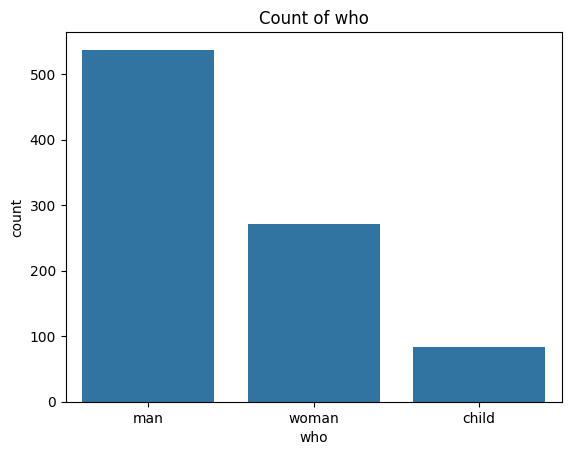

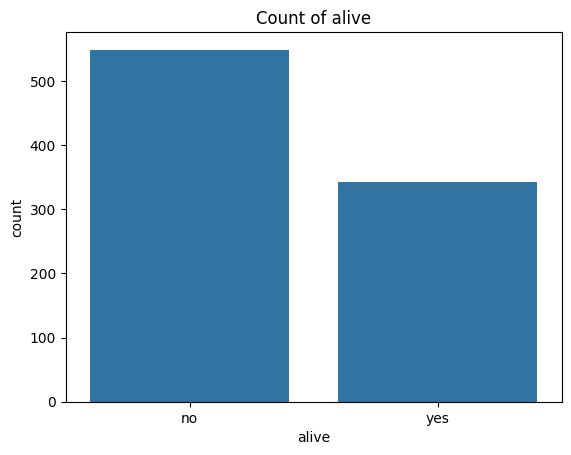

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['sex', 'class', 'embarked', 'who', 'alive']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.show()


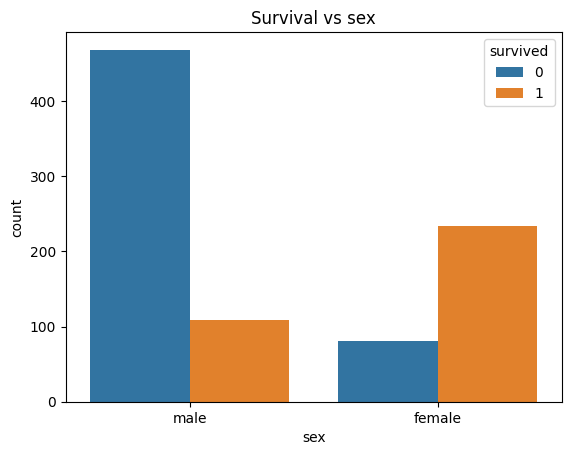

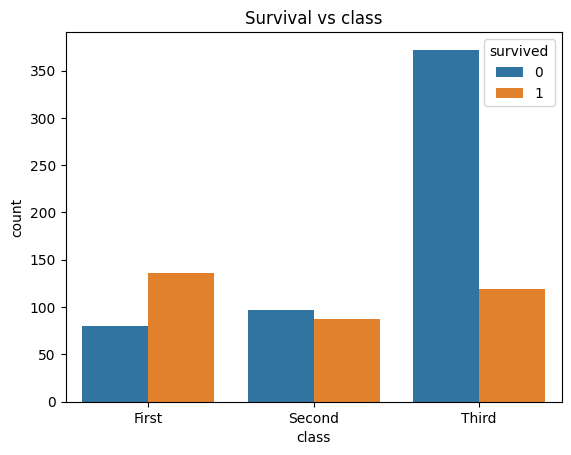

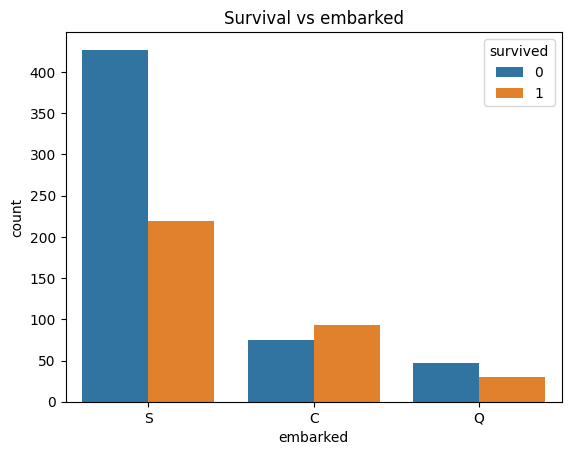

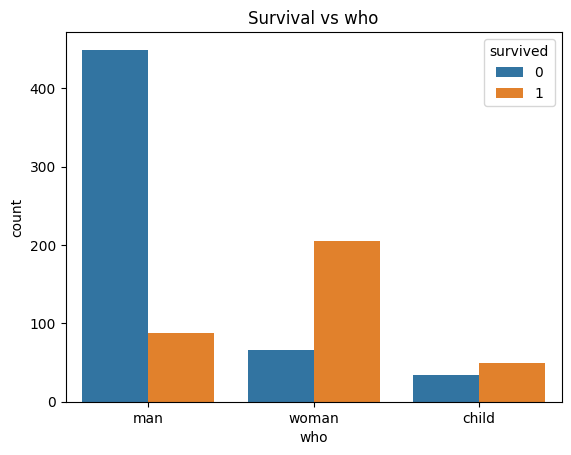

In [9]:
# Compare categorical columns with survival
categorical_cols = ['sex', 'class', 'embarked', 'who']

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='survived')
    plt.title(f"Survival vs {col}")
    plt.show()


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'male'

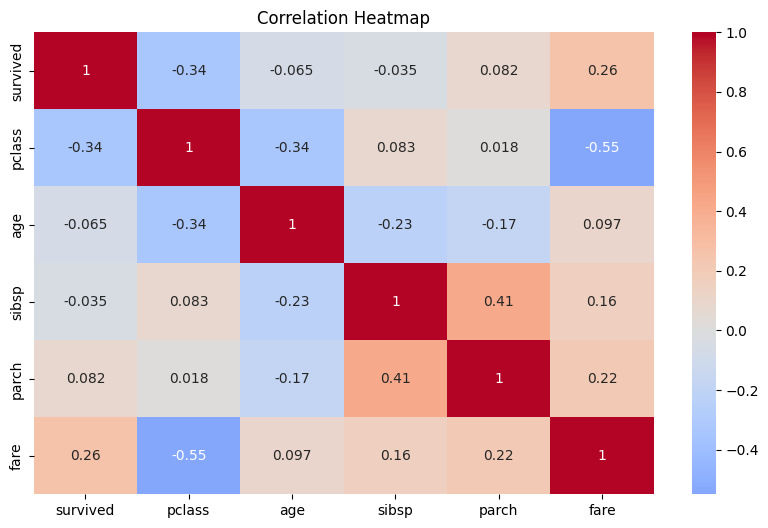

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
